[[47.7  49.55 48.65 ... 42.6  46.25 54.55]
 [49.55 48.65 46.75 ... 46.25 54.55 46.65]
 [48.65 46.75 48.75 ... 54.55 46.65 49.3 ]
 ...
 [16.95 14.85 12.55 ... 12.75 12.9  14.65]
 [14.85 12.55 14.3  ... 12.9  14.65 14.75]
 [12.55 14.3  14.3  ... 14.65 14.75 12.45]]


No handles with labels found to put in legend.


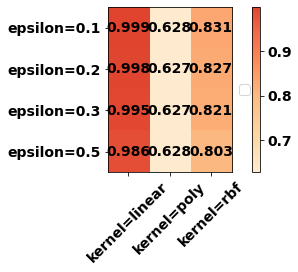

{'C': 1.5, 'epsilon': 0.1, 'kernel': 'linear'}


In [11]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)
from sklearn_evaluation.plot import grid_search
data = pd.read_csv('test.csv',delimiter=',', header = None)
y=data[0].to_numpy()
del data[0]
X=data.to_numpy()
kernel=('linear', 'poly', 'rbf')
cost=[1.5,10]
gamma=[0.01,1e-7, 1e-4]
epsilon=[0.1,0.2,0.5,0.3]
print(X)
parameters = {'kernel': kernel,'epsilon':epsilon,'C':cost}
svr = svm.SVR()
clf = GridSearchCV(svr, parameters, cv=5)
clf.fit(X,y)
#grid_search(clf.cv_results_, change='epsilon', kind='bar')
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


#plt.savefig('kernel.png')
grid_search(clf.cv_results_, change=('epsilon','kernel'),subset={'C': 1.5})
plt.show()
print(clf.best_params_)